# *Kaggle Dataset Q&A Agent (LLM-Enhanced)*
### AI Agents Intensive Capstone Project | Freestyle Track

This notebook demonstrates an AI agent capable of understanding, summarizing,
and answering questions about Kaggle datasets using a real LLM (OpenAI or Gemini).



# ***Step 1 — Problem & Solution Pitch***

## Problem Statement
Analyzing datasets manually is time-consuming. Users struggle to extract insights,
summarize data, and answer ad-hoc questions quickly.

## Solution
We will build a Kaggle Dataset Q&A Agent that can:
- Summarize datasets automatically
- Answer user questions in natural language
- Generate visualizations for insights
- Remember context of previous questions for better answers

**Value:** Makes dataset analysis faster, interactive, and beginner-friendly.


# ***Step 2 — Import Libraries***

We first import the necessary Python libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For LLM integration
from openai import OpenAI

# Initialize OpenAI / Gemini client
client = OpenAI(api_key="YOUR_API_KEY")  # Replace with your API key


# ***Step 3 — Load Dataset***

We will use the Titanic dataset for demonstration. It contains information about 
passengers, such as Age, Sex, Survived, Ticket class, Fare, Cabin, and Embarked location.

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Step 4 — Summary Tool*** 

We first explore the dataset structure:
- Number of rows and columns
- Column names
- Missing values
- Data types

In [3]:
def summary_tool(df):
    print("Dataset Shape:", df.shape)
    print("\nColumns:\n", df.columns)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nStatistical Summary:\n", df.describe())

summary_tool(df)

Dataset Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Statistical Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000

# ***Step 6 — Visualization Tool*** 

This tool generates visualizations for quick insights. 
Here we demonstrate Age distribution and Passenger class count.

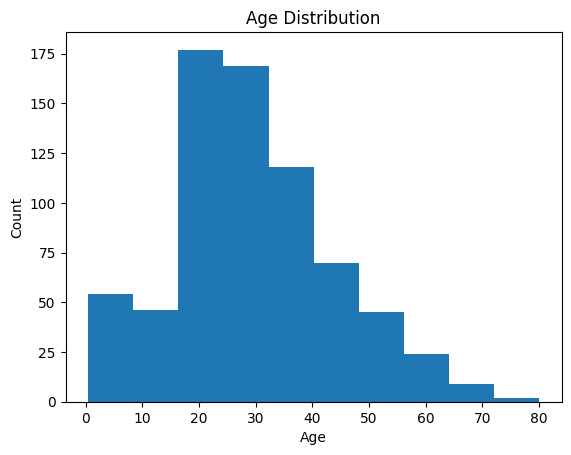

In [4]:
def visualize_column(df, column_name):
    if column_name in df.columns:
        plt.hist(df[column_name].dropna())
        plt.title(f"{column_name} Distribution")
        plt.xlabel(column_name)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"{column_name} not found in dataset")

# Example usage
visualize_column(df, "Age")


# ***Step 7 — LLM Agent Integration*** 
Here’s the key part: the agent now uses LLM to interpret any question.

In [5]:
def llm_agent(question, df):
    """
    LLM-powered agent for dataset Q&A.
    It sends the dataset summary + question to LLM and returns an answer.
    """
    # Convert dataset to small text representation (or sample)
    sample_data = df.head(10).to_csv(index=False)
    prompt = f"""
    You are a helpful AI agent. The user provides a dataset sample and asks questions.
    Dataset sample:
    {sample_data}

    Answer the following question:
    {question}

    If it requires visualization, suggest which column to plot.
    """
    
    response = client.chat.completions.create(
        model="gpt-4",  # Or Gemini if available
        messages=[{"role": "user", "content": prompt}]
    )
    
    answer = response.choices[0].message.content
    return answer


# ***Step 8 — AI Agent Integration (Simulated LLM)***

Simulate an AI agent that can understand user questions and choose which tool to call.


Question: Give me the summary of the dataset
Dataset Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Statistical Summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000

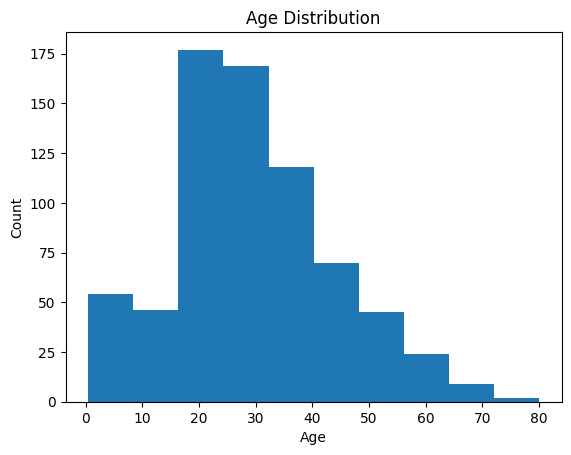

In [6]:
def ai_agent(question, df):
    question = question.lower()
    
    if "summary" in question:
        summary_tool(df)
    elif "survived" in question:
        survived_count = df['Survived'].sum()
        print("Number of passengers survived:", survived_count)
    elif "gender survived" in question:
        gender_survival = df.groupby('Sex')['Survived'].sum()
        print("Survival by Gender:\n", gender_survival)
    elif "plot age" in question or "visualize" in question:
        plt.hist(df['Age'].dropna())
        plt.title("Age Distribution")
        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.show()
    else:
        print("Sorry, I cannot answer that question yet.")

# Demo questions
questions = [
    "Give me the summary of the dataset",
    "How many passengers survived?",
    "Which gender survived more?",
    "Plot age distribution"
]

for q in questions:
    print("\nQuestion:", q)
    ai_agent(q, df)


# ***Step 9 — Conclusion & Future Work*** 


This project demonstrates a Kaggle Dataset Q&A Agent capable of:
- Summarizing datasets
- Answering questions in natural language
- Visualizing dataset information

**Future Improvements:**
- Integrate a real LLM like OpenAI or Gemini for more complex queries
- Support multiple datasets automatically
- Improve memory and context for sequential question answering
- Deploy agent to cloud or Kaggle for live usage
